# 유럽 축구선수 분석

### - Manchester United에는 어떤 유형의 선수가 필요한가

# Introduction

Manchester United는 Alex Ferguson 감독이 은퇴를 하고 당시 타팀에서 감독을 하던 데이비드 모이스감독을 선임 하였지만 거짓말처럼 하락세를 타며 팀의 명성에 걸맞지 않은 순위로 시즌을 끝냈다. 그 후 데이비드 모이스감독이 나간 후 루이 반 할, 조세 무리뉴등 세계적인 감독이 Manchester United의 지휘봉을 맡았으나 Manchester United는 Alex Ferguson 감독이 지휘했던 시절의 위상을 되찾지 못했다. 이러한 사건들을 겪은 Manchester United는 Alex Ferguson 감독이 지휘를 했던 당시 선수였던 올레 군나르 솔샤르 감독을 부임시키는 특단의 조취를 내놓았고, 2020년 3월 기준 올레 군나르 솔샤르감독은 2019/2020시즌 겨울시장에서 단 두명의 선수를 영입하며 Manchester United의 분위기를 반전시키는데 성공한다.

그렇다면, Manchester United의 분위기를 반전시킨 단 두명의 선수는 어떤 선수일까, 그 두명의 선수가 있었기에 Manchester United가 반전에 성공한 것일까? 

<strong>문제가 해결되기 전인 2018/2019 FIFA데이터를 통해 Manchester United 팀을 분석하고 해외 유럽 축구선수 중에 Manchester United에 필요한 유형인 선수를 발굴하고 현재 올레 군나르 솔샤르 감독이 영입한 선수와 비교한다.</strong>

---------------------------------------------------------------------------------------------------------------------------------

# 1. 데이터 수집

## a. 데이터 불러오기

In [1]:
import pandas as pd

In [2]:
# 분석 데이터 Read
data = pd.read_csv('./data/FIFA_data.csv')

In [3]:
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94.0,94.0,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94.0,94.0,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92.0,93.0,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91.0,93.0,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91.0,92.0,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
# head함수 실행시 볼 수 있는 컬럼의 최대 개수를 증가
pd.set_option('display.max_columns', 80)

In [7]:
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94.0,94.0,FC Barcelona,€110.5M,€565K,Left,5.0,4.0,4.0,RF,10.0,"Jul 1, 2004",2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94.0,94.0,Juventus,€77M,€405K,Right,5.0,4.0,5.0,ST,7.0,"Jul 10, 2018",2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92.0,93.0,Paris Saint-Germain,€118.5M,€290K,Right,5.0,5.0,5.0,LW,10.0,"Aug 3, 2017",2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91.0,93.0,Manchester United,€72M,€260K,Right,4.0,3.0,1.0,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91.0,92.0,Manchester City,€102M,€355K,Right,4.0,5.0,4.0,RCM,7.0,"Aug 30, 2015",2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## b. 데이터 확인 후 분석 계획 설립

| 컬럼 명 |  컬럼 의미 |
|--------|-----------|
| ID | 고유의 번호 |
| Name | 이름 |
| Age | 나이 |
| Overall | 현재 능력치 |
| Potential | 잠재 능력치 |
| Club | 소속 팀 |
| Value | 예상 이적료 (유로) |
| Wage | 주급 (유로)|
| Preferred Foot | 잘 사용하는 발 |
| Weak Foot | 잘 사용하지 않는 발 |
| Skill Moves | 개인기 |
| Position | 포지션 |
| Jersey Number | 등번호 |
| Joined | 소속 팀 입단 날짜 |
| Contract Valid Until | 계약 기간 |
| Height | 키 (피트) |
| Weight | 몸무게 (파운드) |
| LS ~ RB | 포지션 별 능력치 |
| Crossing ~ GKReflexes | 세부 능력치 |
| Release Clause | 바이아웃 |


### 해당 컬럼들을 이용해서 어떻게 주제에 맞게 분석을 할지 고민

#### 분석 순서
- 1. Manchester United의 선수들을 분석
- 2. Manchester United의 지역 라이벌  Manchester City선수와 능력치 비교
- 3. 부족한 포지션 2개 선택
- 4. 다른팀의 선수 중  Manchester United의 재정, 현실가능성, 영입방침을 고려하여 2명의 선수를 영입

--------------------------------------------------------------------------------------------------------------------------
# 2. Manchester United 분석
> ## Manchester United는 어떤 선수들이 존재하는가?

## a. EDA

In [8]:
# 현재 데이터는 모든 축구선수들의 데이터가 존재하므로 Manchester United의 선수들만 추출
mu = data[data['Club'] == 'Manchester United']

### `df.unique()`
함수 사용 시 Club이란 컬럼의 유니크한 값들을 볼 수 있음

- Manchester United 선수만 잘 추출되었는지 비교하기 위하여 전의 데이터와 비교

In [9]:
mu['Club'].unique()

array(['Manchester United'], dtype=object)

In [10]:
data['Club'].unique()

array(['FC Barcelona', 'Juventus', 'Paris Saint-Germain',
       'Manchester United', 'Manchester City', 'Chelsea', 'Real Madrid',
       'Atlético Madrid', 'FC Bayern München', 'Tottenham Hotspur',
       'Liverpool', 'Napoli', 'Arsenal', 'Milan', 'Inter', 'Lazio',
       'Borussia Dortmund', 'Vissel Kobe', 'Olympique Lyonnais', 'Roma',
       'Valencia CF', 'Guangzhou Evergrande Taobao FC', 'FC Porto',
       'FC Schalke 04', 'Beşiktaş JK', 'LA Galaxy', 'Sporting CP',
       'Real Betis', 'Olympique de Marseille', 'RC Celta',
       'Bayer 04 Leverkusen', 'Real Sociedad', 'Villarreal CF',
       'Sevilla FC', 'SL Benfica', 'AS Saint-Étienne', 'AS Monaco',
       'Leicester City', 'Atalanta', 'Grêmio', 'Atlético Mineiro',
       'RB Leipzig', 'Ajax', 'Dalian YiFang FC', 'Everton',
       'West Ham United', '1. FC Köln', 'TSG 1899 Hoffenheim',
       'Shanghai SIPG FC', 'OGC Nice', 'Al Nassr',
       'Wolverhampton Wanderers', 'Borussia Mönchengladbach',
       'Hertha BSC', 'SV Werder

In [12]:
mu.shape

(33, 80)

In [13]:
print(f"인원 : {mu.shape[0]}\n")
print(f"맨유 선수들의 포지션 : {mu['Position'].unique()}\n")
print(f"평균 능력치 : {mu['Overall'].mean()} \n")
print(f"평균 잠재 능력치 : {mu['Potential'].mean()}\n")

인원 : 33

맨유 선수들의 포지션 : ['GK' 'RDM' 'ST' 'RW' 'LW' 'CDM' 'RM' 'CM' 'CAM' 'CB' 'RCB' 'LB' 'RB']

평균 능력치 : 80.18181818181819 

평균 잠재 능력치 : 82.81818181818181



`sns.countplot(data)`

- data의 개수를 계산하여 그래프로 그려주는 함수

<AxesSubplot:xlabel='Age', ylabel='count'>

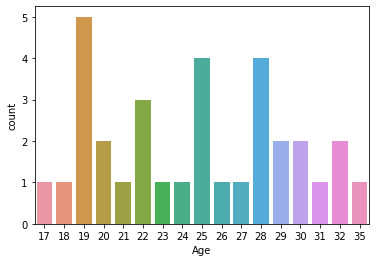

In [16]:
import seaborn as sns

# Manchester United의 나이대
sns.countplot(x=mu['Age'])

<AxesSubplot:xlabel='Position', ylabel='count'>

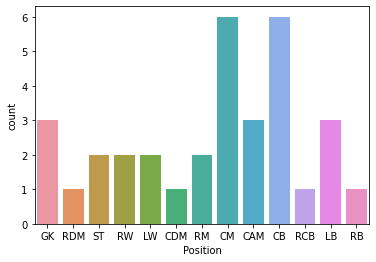

In [17]:
# 포지션의 구성
sns.countplot(x=mu['Position'])

In [15]:
mu.tail()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
10457,240513,E. Hamilton,19,Scotland,65.0,78.0,Manchester United,€1M,€11K,Left,1.0,3.0,3.0,CM,48.0,"Jul 1, 2015",2020,6'1,165lbs,62+2,62+2,62+2,61+2,62+2,62+2,62+2,61+2,63+2,63+2,63+2,61+2,63+2,63+2,63+2,61+2,59+2,62+2,62+2,62+2,59+2,59+2,60+2,60+2,60+2,59+2,57.0,58.0,64.0,69.0,52.0,61.0,54.0,50.0,64.0,65.0,60.0,55.0,62.0,61.0,60.0,70.0,61.0,66.0,68.0,68.0,70.0,59.0,59.0,63.0,51.0,54.0,57.0,54.0,53.0,7.0,11.0,5.0,9.0,11.0,€2.5M
10461,237698,C. Gribbin,19,England,65.0,80.0,Manchester United,€1.2M,€11K,Left,1.0,3.0,3.0,CAM,42.0,"Jul 27, 2015",2019,6'0,159lbs,61+2,61+2,61+2,64+2,63+2,63+2,63+2,64+2,64+2,64+2,64+2,64+2,61+2,61+2,61+2,64+2,54+2,51+2,51+2,51+2,54+2,51+2,45+2,45+2,45+2,51+2,62.0,54.0,54.0,66.0,44.0,69.0,64.0,72.0,63.0,67.0,70.0,68.0,62.0,60.0,66.0,65.0,54.0,65.0,60.0,62.0,50.0,42.0,62.0,64.0,56.0,58.0,22.0,35.0,40.0,7.0,11.0,12.0,7.0,14.0,€2.9M
11081,225557,R. Poole,20,Wales,75.0,80.0,Manchester United,€675K,€13K,Right,1.0,3.0,2.0,CB,50.0,"Sep 1, 2015",2019,5'11,163lbs,48+2,48+2,48+2,51+2,51+2,51+2,51+2,51+2,53+2,53+2,53+2,54+2,56+2,56+2,56+2,54+2,58+2,61+2,61+2,61+2,58+2,59+2,62+2,62+2,62+2,59+2,34.0,28.0,60.0,64.0,25.0,55.0,40.0,30.0,62.0,61.0,70.0,65.0,69.0,57.0,70.0,32.0,78.0,71.0,70.0,32.0,65.0,57.0,44.0,47.0,37.0,55.0,61.0,64.0,61.0,16.0,15.0,13.0,7.0,12.0,€1.4M
11422,237160,R. Williams,19,England,150.0,79.0,Manchester United,€875K,€8K,Right,1.0,3.0,2.0,CB,52.0,"Jan 1, 2016",2019,6'0,165lbs,46+2,46+2,46+2,47+2,46+2,46+2,46+2,47+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2,55+2,57+2,57+2,57+2,55+2,57+2,62+2,62+2,62+2,57+2,32.0,27.0,63.0,58.0,37.0,51.0,35.0,36.0,55.0,50.0,72.0,74.0,58.0,52.0,59.0,43.0,65.0,41.0,68.0,30.0,66.0,56.0,29.0,43.0,49.0,51.0,63.0,68.0,66.0,7.0,5.0,6.0,6.0,9.0,€2.2M
12545,240510,J. Bohui,19,England,63.0,76.0,Manchester United,€700K,€10K,Right,1.0,3.0,3.0,ST,46.0,"Aug 7, 2016",2019,5'9,165lbs,61+2,61+2,61+2,62+2,62+2,62+2,62+2,62+2,61+2,61+2,61+2,60+2,52+2,52+2,52+2,60+2,44+2,41+2,41+2,41+2,44+2,41+2,37+2,37+2,37+2,41+2,45.0,62.0,51.0,58.0,48.0,62.0,48.0,42.0,35.0,65.0,75.0,78.0,71.0,59.0,73.0,59.0,66.0,62.0,64.0,59.0,66.0,21.0,64.0,57.0,64.0,57.0,20.0,16.0,16.0,9.0,7.0,10.0,13.0,11.0,€1.7M


### 이상치 및 결측치 전처리

- 제거: 이상치 및 결측치가 포함되어 있는 행 혹은 열을 제거 (최후의 수단)
- 대체: 이상치 및 결측치를 해당 컬럼의 최댓값, 평균값, 중앙값 등으로 대체 (가장 평범한 수치로 대체, 비어 있는 이유가 있을 수 있는데 무시되므로 추천x)
- 예측: 이상치 및 결측치가 포함된 컬럼의 특성을 고려하여 예측값으로 채워 넣음 (가장 많이 사용)

<AxesSubplot:xlabel='Position', ylabel='Overall'>

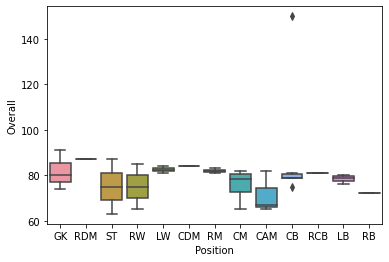

In [18]:
# 데이터적 오류 확인 (이상치 탐색)

import seaborn as sns

# 포지션별 현재 능력치에 대한 Box Plot
# CB에 2개의 이상치
sns.boxplot(data = mu, x = 'Position', y = 'Overall')

### 이상치 처리

- 정상 범주에서 크게 벗어난 값으로서 이상치를 포함하여 분석을 진행할 경우 분석 결과가 왜곡될 가능성이 있음

In [19]:
# 나이가 19살임에도 Overall이 150인 것을 확인
mu[mu['Overall'] > 100] 

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
11422,237160,R. Williams,19,England,150.0,79.0,Manchester United,€875K,€8K,Right,1.0,3.0,2.0,CB,52.0,"Jan 1, 2016",2019,6'0,165lbs,46+2,46+2,46+2,47+2,46+2,46+2,46+2,47+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2,55+2,57+2,57+2,57+2,55+2,57+2,62+2,62+2,62+2,57+2,32.0,27.0,63.0,58.0,37.0,51.0,35.0,36.0,55.0,50.0,72.0,74.0,58.0,52.0,59.0,43.0,65.0,41.0,68.0,30.0,66.0,56.0,29.0,43.0,49.0,51.0,63.0,68.0,66.0,7.0,5.0,6.0,6.0,9.0,€2.2M


In [20]:
# 같은 포지션의 선수를 살펴보니, CB포지션의 점수가 같으면, Overall이 같음
mu[mu['Position'] == 'CB'][['Position','Overall','CB']] 

,Position,Overall,CB
327,CB,81.0,80+2
584,CB,79.0,77+2
629,CB,79.0,78+3
654,CB,79.0,78+2
11081,CB,75.0,62+2
11422,CB,150.0,62+2


In [21]:
mu['Overall'][11422] = 75

<ipython-input-21-70808ee9f71b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mu['Overall'][11422] = 75
C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


<AxesSubplot:xlabel='Position', ylabel='Overall'>

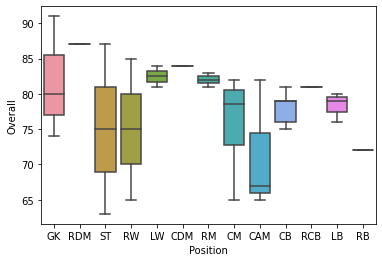

In [22]:
# 이상치가 두개 모두 사라짐
# 위쪽 이상치가 정상적인 수치가 이상치처럼 보이도록 영향을 줬음을 알 수 있음
sns.boxplot(data = mu, x = 'Position', y = 'Overall')

<AxesSubplot:xlabel='Position', ylabel='Potential'>

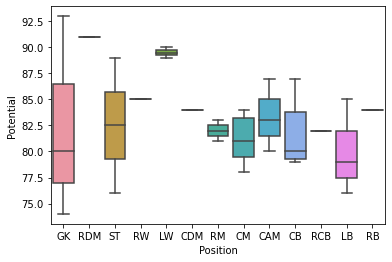

In [23]:
# 다른 능력치도 이상치 확인
sns.boxplot(data = mu, x = 'Position', y = 'Potential')

### 결측치 찾기

- 누락 값, 비어 있는 값으로 데이터 수집 당시에 기록되지 않거나 누락된 값을 의미

In [24]:
# 각 컬럼의 결측치의 개수를 확인
mu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 3 to 12545
Data columns (total 80 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        33 non-null     int64  
 1   Name                      33 non-null     object 
 2   Age                       33 non-null     int64  
 3   Nationality               33 non-null     object 
 4   Overall                   33 non-null     float64
 5   Potential                 33 non-null     float64
 6   Club                      33 non-null     object 
 7   Value                     33 non-null     object 
 8   Wage                      33 non-null     object 
 9   Preferred Foot            33 non-null     object 
 10  International Reputation  33 non-null     float64
 11  Weak Foot                 33 non-null     float64
 12  Skill Moves               33 non-null     float64
 13  Position                  33 non-null     object 
 14  Jersey Nu

In [25]:
# LS ~ RB 까지 결측치 3개
# 포지션이 GK인 선수는 다른 포지션들의 값이 비어있는 것을 확인

mu[mu.isnull()['LS']]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,Spain,91.0,93.0,Manchester United,€72M,€260K,Right,4.0,3.0,1.0,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
526,173373,S. Romero,31,Argentina,80.0,80.0,Manchester United,€9M,€91K,Right,3.0,3.0,1.0,GK,1.0,"Jul 27, 2015",2021,6'4,192lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,14.0,12.0,39.0,17.0,12.0,12.0,13.0,48.0,40.0,47.0,44.0,52.0,78.0,44.0,14.0,63.0,35.0,75.0,11.0,33.0,21.0,11.0,55.0,16.0,62.0,14.0,11.0,15.0,78.0,76.0,81.0,77.0,82.0,€16.7M
2561,53739,L. Grant,35,England,74.0,74.0,Manchester United,€1.3M,€39K,Right,1.0,4.0,1.0,GK,13.0,"Jul 3, 2018",2020,6'4,183lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,17.0,14.0,43.0,15.0,11.0,17.0,19.0,40.0,34.0,52.0,46.0,56.0,69.0,56.0,24.0,73.0,39.0,71.0,19.0,42.0,26.0,14.0,50.0,20.0,60.0,12.0,13.0,19.0,74.0,72.0,74.0,74.0,76.0,€2.5M


In [26]:
# 포지션이 GK인 선수는 다른 포지션에 대한 능력치를 부여할 필요가 없기에 NaN으로 채워진 것으로 보임
# NaN값을 측정할 수 없다는 의미의 -1로 교체
mu = mu.fillna(-1)

In [27]:
# 결칙치 대체 여부 확인
mu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 3 to 12545
Data columns (total 80 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        33 non-null     int64  
 1   Name                      33 non-null     object 
 2   Age                       33 non-null     int64  
 3   Nationality               33 non-null     object 
 4   Overall                   33 non-null     float64
 5   Potential                 33 non-null     float64
 6   Club                      33 non-null     object 
 7   Value                     33 non-null     object 
 8   Wage                      33 non-null     object 
 9   Preferred Foot            33 non-null     object 
 10  International Reputation  33 non-null     float64
 11  Weak Foot                 33 non-null     float64
 12  Skill Moves               33 non-null     float64
 13  Position                  33 non-null     object 
 14  Jersey Nu

# 3. Manchester United는 어떤 포지션을 보강해야 할까?

## a. 전처리


이상치와 결측치를 처리하였으니 다음 분석 단계인 Manchester United의 지역 라이벌  Manchester City선수와 능력치 비교하기 위해서 필요한 전처리들을 진행

In [28]:
# Manchester City 선수와 능력치 비교를 하기 위해 MU, MC선수가 담긴 데이터를 생성
df = data[(data['Club']=='Manchester United') | (data['Club'] == 'Manchester City')]

In [29]:
df['Club'].unique()

array(['Manchester United', 'Manchester City'], dtype=object)

In [30]:
# Value의 타입이 str
# 유로를 보기 쉬운 한화로 변경
df['Value']

3          €72M
4         €102M
13         €60M
23       €64.5M
45         €64M
          ...  
14197     €525K
14511     €450K
15210     €400K
16403     €210K
17451     €120K
Name: Value, Length: 66, dtype: object

### 2021. 09월 기준 1유로 = 1,373원
### 1M = 1,000,000
### 1K = 1,000

In [31]:
# 경고표시 제거
import warnings

warnings.filterwarnings(action='ignore')

In [32]:
df['Value'] = df['Value'].str.replace('M', '000000') # M은 000000으로 대체
df['Value'] = df['Value'].str.replace('K', '000') # K는 000으로 대체
df['Value'].head()

3       €72000000
4      €102000000
13      €60000000
23    €64.5000000
45      €64000000
Name: Value, dtype: object

In [33]:
df['Value'] = df['Value'].str.slice(1,) # 맨 앞 유로표시 제거
df['Value'].head()

3       72000000
4      102000000
13      60000000
23    64.5000000
45      64000000
Name: Value, dtype: object

In [34]:
df['Value'] = df['Value'].str.replace('.', '') # 소숫점 자리 제거
df['Value'].head()

3      72000000
4     102000000
13     60000000
23    645000000
45     64000000
Name: Value, dtype: object

In [35]:
df['Value'] = df['Value'].astype(int) # int형으로 변경
df['Value'].head()

3      72000000
4     102000000
13     60000000
23    645000000
45     64000000
Name: Value, dtype: int32

In [36]:
# 선수들의 Value값이 원화로 변경된 것을 확인
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,Spain,91.0,93.0,Manchester United,72000000,€260K,Right,4.0,3.0,1.0,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91.0,92.0,Manchester City,102000000,€355K,Right,4.0,5.0,4.0,RCM,7.0,"Aug 30, 2015",2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
13,168542,David Silva,32,Spain,90.0,90.0,Manchester City,60000000,€285K,Left,4.0,2.0,4.0,LCM,21.0,"Jul 14, 2010",2020,5'8,148lbs,77+3,77+3,77+3,85+3,84+3,84+3,84+3,85+3,87+3,87+3,87+3,85+3,85+3,85+3,85+3,85+3,69+3,70+3,70+3,70+3,69+3,64+3,57+3,57+3,57+3,64+3,84.0,76.0,54.0,93.0,82.0,89.0,82.0,77.0,87.0,94.0,70.0,64.0,92.0,90.0,90.0,72.0,64.0,78.0,52.0,75.0,57.0,50.0,89.0,92.0,75.0,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,€111M
23,153079,S. Agüero,30,Argentina,89.0,89.0,Manchester City,645000000,€300K,Right,4.0,4.0,4.0,ST,10.0,"Jul 28, 2011",2021,5'8,154lbs,86+3,86+3,86+3,86+3,87+3,87+3,87+3,86+3,85+3,85+3,85+3,83+3,76+3,76+3,76+3,83+3,58+3,56+3,56+3,56+3,58+3,53+3,47+3,47+3,47+3,53+3,70.0,93.0,77.0,81.0,85.0,89.0,82.0,73.0,64.0,89.0,88.0,80.0,86.0,90.0,91.0,88.0,81.0,76.0,73.0,83.0,65.0,24.0,92.0,83.0,83.0,90.0,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0,€119.3M
45,195864,P. Pogba,25,France,87.0,91.0,Manchester United,64000000,€210K,Right,4.0,4.0,5.0,RDM,6.0,"Aug 9, 2016",2021,6'4,185lbs,81+3,81+3,81+3,82+3,82+3,82+3,82+3,82+3,83+3,83+3,83+3,83+3,84+3,84+3,84+3,83+3,77+3,78+3,78+3,78+3,77+3,75+3,74+3,74+3,74+3,75+3,80.0,73.0,73.0,86.0,85.0,87.0,84.0,82.0,90.0,90.0,71.0,79.0,74.0,81.0,64.0,90.0,83.0,88.0,89.0,81.0,78.0,66.0,81.0,87.0,81.0,87.0,66.0,70.0,68.0,5.0,6.0,2.0,4.0,3.0,€123.2M


In [37]:
# MU선수들과 MC선수들을 분리
mu = df[df['Club'] == 'Manchester United']
mc = df[df['Club'] == 'Manchester City']

### 주전선수 비교를 위하여 MU주전과 MC주전을 선발

- GK : 1명, CB : 4명 MF : 4명 ST : 2명을 선발
- 선발의 기준은 현재능력치
- GK 리스트 = GK
- CB 리스트 = CB, LCB, RCB, RB, LB
- MF 리스트 = RCM, LCM, RDM, CDM, CM, RM, CAM
- ST 리스트 = ST, LW, RW

In [38]:
# 각 포지션 별 리스트 작성
gk_list = ['GK'] 
cb_list = ['CB', 'LCB', 'RCB', 'RB', 'LB']
mf_list = ['RCM', 'LCM', 'RDE', 'CDM', 'CM', 'RM', 'CAM']
st_list = ['ST', 'LW', 'RW']

In [40]:
# 각 포지션별 남은 자리 숫자를 입력 (선발 가능 인원)
st_count = 2 
mf_count = 4
cb_count = 4
gk_count = 1

mu_id = []

for index in mu.index :
    if mu['Position'][index] in gk_list :
        if gk_count != 0 :
            mu_id.append(mu['ID'][index])
            gk_count -= 1
    elif mu['Position'][index] in cb_list :
        if cb_count != 0 :
            mu_id.append(mu['ID'][index])
            mu['Position'][index] = 'CB'
            cb_count -= 1
    elif mu['Position'][index] in mf_list :
        if mf_count != 0 :
            mu_id.append(mu['ID'][index])
            mu['Position'][index] = 'MF'
            mf_count -= 1
    else :
        if st_count != 0 :
            mu_id.append(mu['ID'][index])
            mu['Position'][index] = 'ST'
            st_count -= 1

- `isin()`

괄호 안의 리스트에 속하는 값만 True로 반환

In [42]:
mu = mu[mu['ID'].isin(mu_id)] # 리스트 안에 있는 선수만 MU선수로 남김
mu

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,Spain,91.0,93.0,Manchester United,72000000,€260K,Right,4.0,3.0,1.0,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
45,195864,P. Pogba,25,France,87.0,91.0,Manchester United,64000000,€210K,Right,4.0,4.0,5.0,ST,6.0,"Aug 9, 2016",2021,6'4,185lbs,81+3,81+3,81+3,82+3,82+3,82+3,82+3,82+3,83+3,83+3,83+3,83+3,84+3,84+3,84+3,83+3,77+3,78+3,78+3,78+3,77+3,75+3,74+3,74+3,74+3,75+3,80.0,73.0,73.0,86.0,85.0,87.0,84.0,82.0,90.0,90.0,71.0,79.0,74.0,81.0,64.0,90.0,83.0,88.0,89.0,81.0,78.0,66.0,81.0,87.0,81.0,87.0,66.0,70.0,68.0,5.0,6.0,2.0,4.0,3.0,€123.2M
47,192505,R. Lukaku,25,Belgium,87.0,89.0,Manchester United,625000000,€230K,Left,3.0,3.0,3.0,ST,9.0,"Jul 10, 2017",2022,6'3,207lbs,84+3,84+3,84+3,79+3,81+3,81+3,81+3,79+3,78+3,78+3,78+3,79+3,72+3,72+3,72+3,79+3,60+3,58+3,58+3,58+3,60+3,57+3,54+3,54+3,54+3,57+3,78.0,87.0,86.0,77.0,79.0,80.0,74.0,66.0,73.0,72.0,77.0,90.0,60.0,86.0,46.0,88.0,71.0,84.0,94.0,74.0,75.0,27.0,89.0,76.0,78.0,83.0,30.0,30.0,30.0,8.0,15.0,14.0,7.0,10.0,€120.3M
132,191202,N. Matić,29,Serbia,84.0,84.0,Manchester United,24000000,€165K,Left,3.0,3.0,3.0,MF,31.0,"Jul 31, 2017",2020,6'4,187lbs,73+3,73+3,73+3,72+3,74+3,74+3,74+3,72+3,74+3,74+3,74+3,74+3,79+3,79+3,79+3,74+3,78+3,82+3,82+3,82+3,78+3,77+3,80+3,80+3,80+3,77+3,71.0,64.0,74.0,84.0,73.0,80.0,72.0,67.0,83.0,79.0,52.0,59.0,44.0,83.0,50.0,83.0,67.0,84.0,85.0,75.0,80.0,86.0,69.0,73.0,64.0,84.0,83.0,84.0,75.0,7.0,15.0,12.0,14.0,9.0,€44.4M
211,178088,Juan Mata,30,Spain,83.0,83.0,Manchester United,245000000,€160K,Left,3.0,3.0,4.0,MF,8.0,"Jan 25, 2014",2019,5'7,139lbs,74+3,74+3,74+3,80+3,80+3,80+3,80+3,80+3,82+3,82+3,82+3,80+3,77+3,77+3,77+3,80+3,61+3,60+3,60+3,60+3,61+3,56+3,46+3,46+3,46+3,56+3,83.0,78.0,56.0,85.0,71.0,82.0,84.0,86.0,79.0,88.0,69.0,62.0,84.0,85.0,89.0,75.0,70.0,71.0,37.0,72.0,50.0,39.0,83.0,85.0,81.0,87.0,42.0,31.0,21.0,9.0,10.0,14.0,5.0,8.0,€45.3M
250,209297,Fred,25,Brazil,82.0,84.0,Manchester United,265000000,€140K,Left,1.0,4.0,4.0,MF,17.0,"Jun 21, 2018",2023,5'7,141lbs,74+2,74+2,74+2,77+2,77+2,77+2,77+2,77+2,79+2,79+2,79+2,78+2,80+2,80+2,80+2,78+2,78+2,79+2,79+2,79+2,78+2,77+2,73+2,73+2,73+2,77+2,67.0,74.0,55.0,85.0,70.0,79.0,70.0,72.0,80.0,86.0,77.0,79.0,84.0,82.0,87.0,76.0,83.0,87.0,61.0,76.0,73.0,80.0,69.0,76.0,65.0,82.0,76.0,78.0,69.0,7.0,16.0,15.0,11.0,15.0,€51M
254,207494,J. Lingard,25,England,82.0,83.0,Manchester United,265000000,€140K,Right,2.0,3.0,4.0,MF,7.0,"Jul 1, 2010",2021,5'9,137lbs,78+2,78+2,78+2,81+2,81+2,81+2,81+2,81+2,81+2,81+2,81+2,80+2,76+2,76+2,76+2,80+2,70+2,67+2,67+2,67+2,70+2,67+2,60+2,60+2,60+2,67+2,74.0,78.0,64.0,78.0,70.0,83.0,80.0,63.0,66.0,83.0,84.0,82.0,86.0,83.0,86.0,80.0,63.0,87.0,53.0,80.0,73.0,53.0,86.0,82.0,65.0,84.0,65.0,50.0,44.0,14.0,10.0,8.0,13.0,9.0,€51M
327,225508,E. Bailly,24,Ivory Coast,81.0,87.0,Manchester United,21000000,€105K,Right,2.0,3.0,2.0,CB,2.0,"Jul 1, 2016",2020,6'1,170lbs,58+2,58+2,58+2,58+2,58+2,58+2,58+2,58+2,59+2,59+2,59+2,60+2,63+2,63+2,63+2,60+2,72+2,73+2,73+2,73+2,72+2,74+2,80+2,80+2,80+2,74+2,51.0,33.0,79.0,70.0,42.0,60.0,46.0,43.0,56.0,65.0,68.0,79.0,65.0,74.0,62.0,55.0,85.

In [43]:
# MC 선수도 진행
# 각 포지션별 남은 자리 숫자를 입력 (선발 가능 인원)
st_count = 2 
mf_count = 4
cb_count = 4
gk_count = 1

mc_id = []

for index in mc.index :
    if mc['Position'][index] in gk_list :
        if gk_count != 0 :
            mc_id.append(mc['ID'][index])
            gk_count -= 1
    elif mc['Position'][index] in cb_list :
        if cb_count != 0 :
            mc_id.append(mc['ID'][index])
            mc['Position'][index] = 'CB'
            cb_count -= 1
    elif mc['Position'][index] in mf_list :
        if mf_count != 0 :
            mc_id.append(mc['ID'][index])
            mc['Position'][index] = 'MF'
            mf_count -= 1
    else :
        if st_count != 0 :
            mc_id.append(mc['ID'][index])
            mc['Position'][index] = 'ST'
            st_count -= 1

In [45]:
mc = mc[mc['ID'].isin(mc_id)] # 리스트 안에 있는 선수만 MC선수로 남김
mc

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
4,192985,K. De Bruyne,27,Belgium,91.0,92.0,Manchester City,102000000,€355K,Right,4.0,5.0,4.0,MF,7.0,"Aug 30, 2015",2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
13,168542,David Silva,32,Spain,90.0,90.0,Manchester City,60000000,€285K,Left,4.0,2.0,4.0,MF,21.0,"Jul 14, 2010",2020,5'8,148lbs,77+3,77+3,77+3,85+3,84+3,84+3,84+3,85+3,87+3,87+3,87+3,85+3,85+3,85+3,85+3,85+3,69+3,70+3,70+3,70+3,69+3,64+3,57+3,57+3,57+3,64+3,84.0,76.0,54.0,93.0,82.0,89.0,82.0,77.0,87.0,94.0,70.0,64.0,92.0,90.0,90.0,72.0,64.0,78.0,52.0,75.0,57.0,50.0,89.0,92.0,75.0,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,€111M
23,153079,S. Agüero,30,Argentina,89.0,89.0,Manchester City,645000000,€300K,Right,4.0,4.0,4.0,ST,10.0,"Jul 28, 2011",2021,5'8,154lbs,86+3,86+3,86+3,86+3,87+3,87+3,87+3,86+3,85+3,85+3,85+3,83+3,76+3,76+3,76+3,83+3,58+3,56+3,56+3,56+3,58+3,53+3,47+3,47+3,47+3,53+3,70.0,93.0,77.0,81.0,85.0,89.0,82.0,73.0,64.0,89.0,88.0,80.0,86.0,90.0,91.0,88.0,81.0,76.0,73.0,83.0,65.0,24.0,92.0,83.0,83.0,90.0,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0,€119.3M
55,222492,L. Sané,22,Germany,86.0,92.0,Manchester City,61000000,€195K,Left,2.0,3.0,4.0,ST,19.0,"Aug 2, 2016",2021,6'0,165lbs,82+2,82+2,82+2,84+2,84+2,84+2,84+2,84+2,82+2,82+2,82+2,83+2,74+2,74+2,74+2,83+2,65+2,59+2,59+2,59+2,65+2,61+2,52+2,52+2,52+2,61+2,83.0,81.0,72.0,79.0,85.0,88.0,82.0,68.0,64.0,85.0,93.0,96.0,88.0,81.0,81.0,86.0,64.0,79.0,70.0,78.0,61.0,34.0,84.0,82.0,71.0,78.0,36.0,32.0,35.0,8.0,12.0,9.0,9.0,14.0,€125.1M
57,210257,Ederson,24,Brazil,86.0,90.0,Manchester City,415000000,€125K,Left,2.0,3.0,1.0,GK,31.0,"Jul 1, 2017",2025,6'2,190lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,14.0,14.0,56.0,18.0,23.0,15.0,20.0,58.0,37.0,64.0,63.0,60.0,86.0,48.0,42.0,58.0,41.0,68.0,18.0,35.0,25.0,20.0,67.0,17.0,70.0,28.0,15.0,8.0,85.0,80.0,91.0,82.0,87.0,€79.9M
75,135507,Fernandinho,33,Brazil,86.0,86.0,Manchester City,18000000,€185K,Right,3.0,4.0,3.0,MF,25.0,"Jul 1, 2013",2020,5'10,148lbs,74+3,74+3,74+3,75+3,76+3,76+3,76+3,75+3,77+3,77+3,77+3,76+3,80+3,80+3,80+3,76+3,79+3,83+3,83+3,83+3,79+3,79+3,81+3,81+3,81+3,79+3,68.0,69.0,63.0,85.0,74.0,77.0,70.0,72.0,81.0,82.0,68.0,67.0,72.0,86.0,78.0,83.0,76.0,79.0,76.0,78.0,87.0,88.0,70.0,75.0,61.0,79.0,85.0,85.0,80.0,12.0,11.0,5.0,13.0,7.0,€33.3M
89,192366,N. Otamendi,30,Argentina,85.0,85.0,Manchester City,285000000,€170K,Right,3.0,3.0,2.0,CB,30.0,"Aug 20, 2015",2022,6'0,179lbs,64+3,64+3,64+3,59+3,61+3,61+3,61+3,59+3,62+3,62+3,62+3,61+3,67+3,67+3,67+3,61+3,72+3,77+3,77+3,77+3,72+3,74+3,82+3,82+3,82+3,74+3,52.0,54.0,85.0,75.0,57.0,51.0,50.0,39.0,72.0,70.0,57.0,61.0,64.0,79.0,62.0,69.0,92.0,67.0,80.0,56.0,91.0,84.0,51.0,53.0,45.0,80.0,83.0,85.0,84.0,12.0,5.0,8.0,11.0,12.0,€52.7M
107,139720,V. Kompany,32,Belgium,85.0,85.0,Manchester City,22000000,€170K,Right,4.0,3.0,2.0,CB,4.0,"Aug 22, 2008",2019,6'3,187lbs,63+3,63+3,63+3,60+3,61+3,61+3,61+3,60+3,62+3,62+3,62+3,62+3,67+3,67+3,67+3,62+3,73+3,77+3,77+3,77+3,73+3,75+3,83+3,83+3,83+3,75+3,61.0,45.0,84.0,73.0,46.0,63.0,61.0,52.0,66.0,70.0,52.0,59.0,57.0,87.0,41

In [50]:
df = pd.concat([mu,mc]) # mu, mc 주전선수가 모인 데이터를 생성
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,Spain,91.0,93.0,Manchester United,72000000,€260K,Right,4.0,3.0,1.0,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
45,195864,P. Pogba,25,France,87.0,91.0,Manchester United,64000000,€210K,Right,4.0,4.0,5.0,ST,6.0,"Aug 9, 2016",2021,6'4,185lbs,81+3,81+3,81+3,82+3,82+3,82+3,82+3,82+3,83+3,83+3,83+3,83+3,84+3,84+3,84+3,83+3,77+3,78+3,78+3,78+3,77+3,75+3,74+3,74+3,74+3,75+3,80.0,73.0,73.0,86.0,85.0,87.0,84.0,82.0,90.0,90.0,71.0,79.0,74.0,81.0,64.0,90.0,83.0,88.0,89.0,81.0,78.0,66.0,81.0,87.0,81.0,87.0,66.0,70.0,68.0,5.0,6.0,2.0,4.0,3.0,€123.2M
47,192505,R. Lukaku,25,Belgium,87.0,89.0,Manchester United,625000000,€230K,Left,3.0,3.0,3.0,ST,9.0,"Jul 10, 2017",2022,6'3,207lbs,84+3,84+3,84+3,79+3,81+3,81+3,81+3,79+3,78+3,78+3,78+3,79+3,72+3,72+3,72+3,79+3,60+3,58+3,58+3,58+3,60+3,57+3,54+3,54+3,54+3,57+3,78.0,87.0,86.0,77.0,79.0,80.0,74.0,66.0,73.0,72.0,77.0,90.0,60.0,86.0,46.0,88.0,71.0,84.0,94.0,74.0,75.0,27.0,89.0,76.0,78.0,83.0,30.0,30.0,30.0,8.0,15.0,14.0,7.0,10.0,€120.3M
132,191202,N. Matić,29,Serbia,84.0,84.0,Manchester United,24000000,€165K,Left,3.0,3.0,3.0,MF,31.0,"Jul 31, 2017",2020,6'4,187lbs,73+3,73+3,73+3,72+3,74+3,74+3,74+3,72+3,74+3,74+3,74+3,74+3,79+3,79+3,79+3,74+3,78+3,82+3,82+3,82+3,78+3,77+3,80+3,80+3,80+3,77+3,71.0,64.0,74.0,84.0,73.0,80.0,72.0,67.0,83.0,79.0,52.0,59.0,44.0,83.0,50.0,83.0,67.0,84.0,85.0,75.0,80.0,86.0,69.0,73.0,64.0,84.0,83.0,84.0,75.0,7.0,15.0,12.0,14.0,9.0,€44.4M
211,178088,Juan Mata,30,Spain,83.0,83.0,Manchester United,245000000,€160K,Left,3.0,3.0,4.0,MF,8.0,"Jan 25, 2014",2019,5'7,139lbs,74+3,74+3,74+3,80+3,80+3,80+3,80+3,80+3,82+3,82+3,82+3,80+3,77+3,77+3,77+3,80+3,61+3,60+3,60+3,60+3,61+3,56+3,46+3,46+3,46+3,56+3,83.0,78.0,56.0,85.0,71.0,82.0,84.0,86.0,79.0,88.0,69.0,62.0,84.0,85.0,89.0,75.0,70.0,71.0,37.0,72.0,50.0,39.0,83.0,85.0,81.0,87.0,42.0,31.0,21.0,9.0,10.0,14.0,5.0,8.0,€45.3M


In [49]:
df.tail()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
89,192366,N. Otamendi,30,Argentina,85.0,85.0,Manchester City,285000000,€170K,Right,3.0,3.0,2.0,CB,30.0,"Aug 20, 2015",2022,6'0,179lbs,64+3,64+3,64+3,59+3,61+3,61+3,61+3,59+3,62+3,62+3,62+3,61+3,67+3,67+3,67+3,61+3,72+3,77+3,77+3,77+3,72+3,74+3,82+3,82+3,82+3,74+3,52.0,54.0,85.0,75.0,57.0,51.0,50.0,39.0,72.0,70.0,57.0,61.0,64.0,79.0,62.0,69.0,92.0,67.0,80.0,56.0,91.0,84.0,51.0,53.0,45.0,80.0,83.0,85.0,84.0,12.0,5.0,8.0,11.0,12.0,€52.7M
107,139720,V. Kompany,32,Belgium,85.0,85.0,Manchester City,22000000,€170K,Right,4.0,3.0,2.0,CB,4.0,"Aug 22, 2008",2019,6'3,187lbs,63+3,63+3,63+3,60+3,61+3,61+3,61+3,60+3,62+3,62+3,62+3,62+3,67+3,67+3,67+3,62+3,73+3,77+3,77+3,77+3,73+3,75+3,83+3,83+3,83+3,75+3,61.0,45.0,84.0,73.0,46.0,63.0,61.0,52.0,66.0,70.0,52.0,59.0,57.0,87.0,41.0,75.0,72.0,66.0,87.0,55.0,87.0,82.0,41.0,59.0,63.0,81.0,87.0,85.0,84.0,10.0,9.0,5.0,8.0,6.0,€40.7M
113,212218,A. Laporte,24,France,84.0,88.0,Manchester City,34000000,€135K,Left,2.0,3.0,2.0,CB,14.0,"Jan 30, 2018",2023,6'2,187lbs,64+2,64+2,64+2,61+2,63+2,63+2,63+2,61+2,63+2,63+2,63+2,64+2,70+2,70+2,70+2,64+2,75+2,79+2,79+2,79+2,75+2,77+2,82+2,82+2,82+2,77+2,58.0,45.0,85.0,76.0,40.0,59.0,61.0,69.0,78.0,73.0,62.0,66.0,45.0,83.0,55.0,68.0,75.0,67.0,82.0,47.0,75.0,85.0,54.0,57.0,44.0,77.0,85.0,86.0,87.0,10.0,11.0,5.0,14.0,5.0,€65.5M
135,188377,K. Walker,28,England,84.0,84.0,Manchester City,245000000,€165K,Right,3.0,2.0,2.0,CB,2.0,"Jul 14, 2017",2022,6'0,154lbs,72+3,72+3,72+3,75+3,74+3,74+3,74+3,75+3,73+3,73+3,73+3,77+3,75+3,75+3,75+3,77+3,82+3,78+3,78+3,78+3,82+3,82+3,79+3,79+3,79+3,82+3,81.0,51.0,74.0,78.0,57.0,79.0,76.0,71.0,67.0,78.0,86.0,93.0,67.0,83.0,72.0,86.0,83.0,89.0,75.0,69.0,78.0,81.0,67.0,69.0,63.0,75.0,78.0,84.0,83.0,12.0,6.0,16.0,15.0,8.0,€45.3M
136,186942,I. Gündoğan,27,Germany,84.0,84.0,Manchester City,32000000,€175K,Right,3.0,4.0,4.0,MF,21.0,"Jul 1, 2016",2020,5'11,176lbs,75+3,75+3,75+3,79+3,80+3,80+3,80+3,79+3,82+3,82+3,82+3,80+3,82+3,82+3,82+3,80+3,75+3,77+3,77+3,77+3,75+3,72+3,70+3,70+3,70+3,72+3,74.0,73.0,50.0,88.0,75.0,85.0,81.0,74.0,83.0,86.0,67.0,68.0,78.0,85.0,78.0,77.0,61.0,69.0,72.0,73.0,70.0,77.0,79.0,86.0,76.0,87.0,73.0,68.0,64.0,11.0,14.0,5.0,5.0,13.0,€59.2M


## b. EDA

- 주전선수 비교

<AxesSubplot:xlabel='Position', ylabel='Overall'>

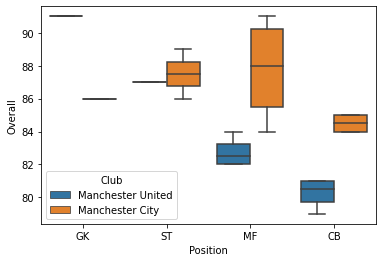

In [51]:
# 박스클폿은 이상치를 확인할 수 있을뿐 아니라 비교도 할 수 있음
# hue: 구분자
sns.boxplot(data=df, x='Position', y = 'Overall', hue = 'Club')

<AxesSubplot:xlabel='Position', ylabel='Value'>

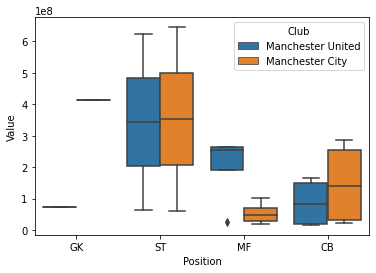

In [52]:
sns.boxplot(data=df, x='Position', y = 'Value', hue = 'Club')

MU선수와 MC선수를 비교해보면 이적료 대비 능력치가 떨어지는 포지션은 MF, CB인 것을 확인할 수 있음

# 4. Manchester United는 어떤 선수를 영입해야 할까?

## a. EDA

- 필요 포지션의 어떤 선수를 대체해야할지 확인
- 기준은 영입일, 능력치, 잠재력, 나이

### 나만의 공식 만들기

- 잔류포인트 = (Overall * 2 + Potential) / Age 

In [53]:
mu['Point'] = (mu['Overall']*2 + mu['Potential']) / mu['Age']

In [54]:
mu[mu['Position']=='MF'][['Name','Overall','Potential','Age', 'Joined', 'Point']]

,Name,Overall,Potential,Age,Joined,Point
132,N. Matić,84.0,84.0,29,"Jul 31, 2017",8.689655
211,Juan Mata,83.0,83.0,30,"Jan 25, 2014",8.300000
250,Fred,82.0,84.0,25,"Jun 21, 2018",9.920000
254,J. Lingard,82.0,83.0,25,"Jul 1, 2010",9.880000


In [55]:
mu[mu['Position']=='CB'][['Name','Overall','Potential','Age', 'Joined', 'Point']]

,Name,Overall,Potential,Age,Joined,Point
327,E. Bailly,81.0,87.0,24,"Jul 1, 2016",10.375000
377,C. Smalling,81.0,82.0,28,"Jul 1, 2010",8.714286
454,L. Shaw,80.0,85.0,22,"Jun 27, 2014",11.136364
584,V. Lindelöf,79.0,85.0,23,"Jul 1, 2017",10.565217


#### 잔류포인트가 가장 낮은 Juan Mata, C. Smalling 방출 후 MF, CB한명씩 영입

## b. 시각화

- PPT 설명

지금까지의 EDA를 바탕으로 데려올 선수들의 능력치를 시각화합시다.

- Manchester United의 영입방칙은 최근 새로 부임한 솔샤르감독의 영입방침을 따릅니다.
- 선수의 나이는 어릴수록 좋음
- 잠재력 보다 현재 바로 주전으로 사용할 수 있는 선수
- 포지션은 마타와 스몰링의 상세포지션인 RM, CB를 따른다.


In [60]:
# RM, CB 포지션을 제외한 선수들을 제거
market = data[(data['Position']=='CB') | (data['Position']=='RM')]

market.head() # 이적 시장

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
12,182493,D. Godín,32,Uruguay,90.0,90.0,Atlético Madrid,€44M,€125K,Right,3.0,3.0,2.0,CB,10.0,"Aug 4, 2010",2019,6'2,172lbs,64+3,64+3,64+3,61+3,62+3,62+3,62+3,61+3,62+3,62+3,62+3,63+3,68+3,68+3,68+3,63+3,76+3,81+3,81+3,81+3,76+3,79+3,87+3,87+3,87+3,79+3,55.0,42.0,92.0,79.0,47.0,53.0,49.0,51.0,70.0,76.0,68.0,68.0,58.0,85.0,54.0,67.0,91.0,66.0,88.0,43.0,89.0,88.0,48.0,52.0,50.0,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,€90.2M
25,231747,K. Mbappé,19,France,88.0,95.0,Paris Saint-Germain,€81M,€100K,Right,3.0,4.0,5.0,RM,10.0,"Jul 1, 2018",2022,5'10,161lbs,85+3,85+3,85+3,87+3,87+3,87+3,87+3,87+3,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,66+3,62+3,62+3,62+3,66+3,62+3,54+3,54+3,54+3,62+3,77.0,88.0,77.0,82.0,78.0,90.0,77.0,63.0,73.0,91.0,96.0,96.0,92.0,87.0,83.0,79.0,75.0,83.0,71.0,78.0,62.0,38.0,88.0,82.0,70.0,86.0,34.0,34.0,32.0,13.0,5.0,7.0,11.0,6.0,€166.1M
26,209331,M. Salah,26,Egypt,88.0,89.0,Liverpool,€69.5M,€255K,Left,3.0,3.0,4.0,RM,10.0,"Jul 1, 2017",2023,5'9,157lbs,83+3,83+3,83+3,87+3,86+3,86+3,86+3,87+3,86+3,86+3,86+3,86+3,80+3,80+3,80+3,86+3,70+3,66+3,66+3,66+3,70+3,66+3,57+3,57+3,57+3,66+3,78.0,90.0,59.0,82.0,73.0,89.0,83.0,60.0,72.0,88.0,94.0,91.0,91.0,91.0,88.0,77.0,68.0,84.0,70.0,83.0,63.0,55.0,90.0,82.0,61.0,91.0,38.0,43.0,41.0,14.0,14.0,9.0,11.0,14.0,€137.3M
42,205600,S. Umtiti,24,France,87.0,92.0,FC Barcelona,€57M,€205K,Left,3.0,3.0,2.0,CB,23.0,"Jul 12, 2016",2023,6'0,165lbs,70+3,70+3,70+3,69+3,69+3,69+3,69+3,69+3,69+3,69+3,69+3,70+3,73+3,73+3,73+3,70+3,80+3,81+3,81+3,81+3,80+3,81+3,84+3,84+3,84+3,81+3,69.0,51.0,79.0,81.0,70.0,69.0,72.0,62.0,73.0,77.0,71.0,73.0,68.0,82.0,66.0,83.0,89.0,78.0,84.0,74.0,81.0,87.0,58.0,58.0,61.0,82.0,90.0,89.0,86.0,15.0,10.0,14.0,12.0,15.0,€121.1M
73,177509,M. Benatia,31,Morocco,86.0,86.0,Juventus,€30M,€160K,Right,3.0,3.0,2.0,CB,4.0,"Aug 26, 2014",2020,6'2,207lbs,61+3,61+3,61+3,57+3,58+3,58+3,58+3,57+3,57+3,57+3,57+3,60+3,62+3,62+3,62+3,60+3,73+3,76+3,76+3,76+3,73+3,75+3,84+3,84+3,84+3,75+3,45.0,47.0,83.0,65.0,44.0,64.0,34.0,27.0,65.0,64.0,65.0,75.0,59.0,82.0,53.0,66.0,85.0,69.0,91.0,24.0,86.0,86.0,38.0,47.0,41.0,82.0,89.0,87.0,85.0,7.0,4.0,8.0,7.0,11.0,€49.5M


`plt.subplots(행, 열, figsize=(가로, 세로))` 심화

여러개의 그래프를 한번에 그리기 위하여 설정해 줍니다.

이것을 변수 ax에 담는다면 ax[1, 1]은 1열 1행에 그래프가 그려집니다.

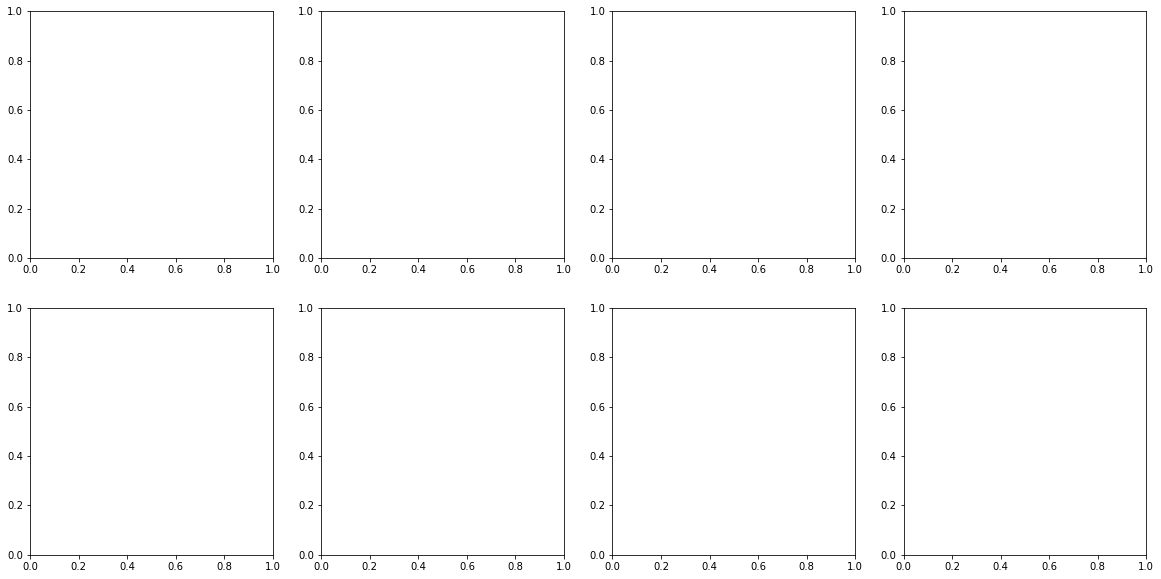

In [58]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(2,4, figsize=(20,10))

`plt.barplot(x, y, data, palette, ax)` 심화

앞에서 배운 barplot에서 색을 지정할 수 있는 palette와 어디에 그릴지 위치를 지정할 수 있는 ax도 배워봅시다.

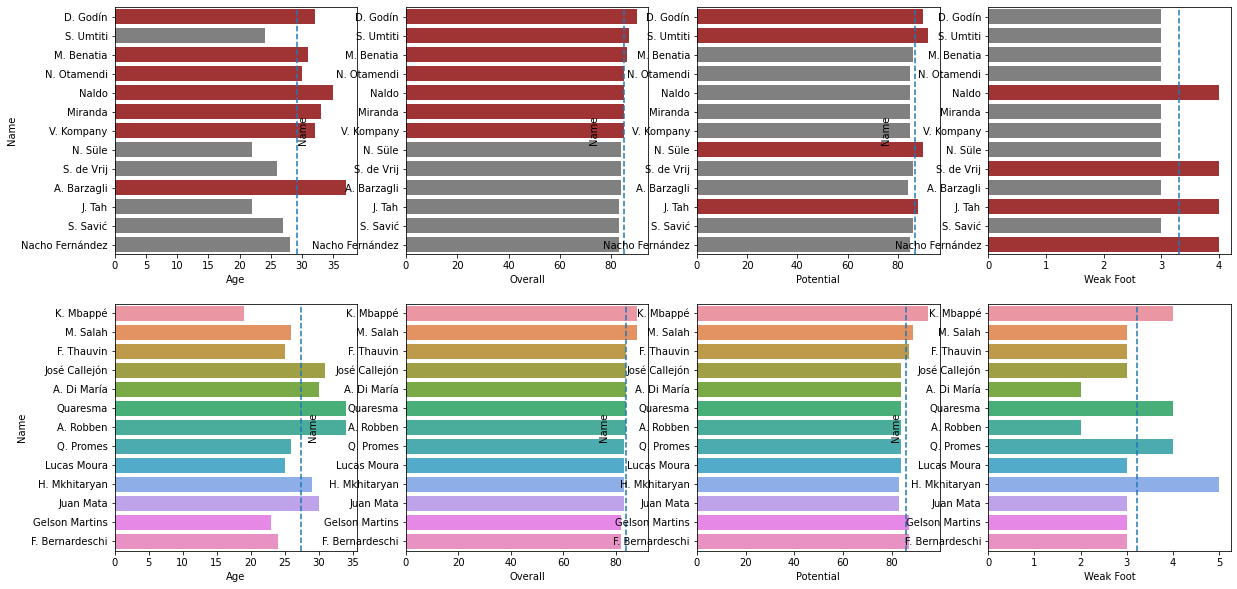

In [61]:
f, ax = plt.subplots(2,4, figsize=(20,10))

vs_list = ['Age', 'Overall', 'Potential', 'Weak Foot']

for i in range(8) :
    
    if i < 4 :
        colors = ['firebrick' if x > market[market['Position']=='CB'][:13][vs_list[i]].mean() else 'gray' for x in market[market['Position']=='CB'][:13][vs_list[i]]]
        
        sns.barplot(x= vs_list[i], y = 'Name', data = market[market['Position']=='CB'][:13], palette = colors, ax = ax[i//4, i%4])
        
        ax[i//4, i%4].axvline(market[market['Position']=='CB'][:13][vs_list[i]].mean(), ls = '--')
        
    else :
        sns.barplot(x = vs_list[i%4], y = 'Name', data = market[market['Position']=='RM'][:13], ax = ax[i//4, i%4])
        
        ax[i//4, i%4].axvline(market[market['Position']=='RM'][:13][vs_list[i%4]].mean(), ls= '--')